In [ ]:
from google.colab import drive

In [ ]:

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/tea sickness dataset',
    labels='inferred', # If subdirectories are named by class
    label_mode='int',   # Use 'int' or 'categorical'
    batch_size=32,      # Batch size for training
    image_size=(256, 256)  # Resize images to this size
)

# View the dataset structure
for images, labels in dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)


Found 905 files belonging to 8 classes.
Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)


# **RESNET50**

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 0.3731 - loss: 35.8840 - val_accuracy: 0.7445 - val_loss: 2.0419
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.6457 - loss: 3.7580 - val_accuracy: 0.8832 - val_loss: 0.5246
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.6730 - loss: 1.4256 - val_accuracy: 0.8905 - val_loss: 0.3511
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7208 - loss: 0.8937 - val_accuracy: 0.8613 - val_loss: 0.3484
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.7513 - loss: 0.6378 - val_accuracy: 0.8613 - val_loss: 0.3541
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8142 - loss: 0.7358 - val_accuracy: 0.9124 - val_loss: 0.2274
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.8194 - loss: 0.6210 - val_accuracy: 0.9270 - val_loss: 0.1928
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7828 - loss: 0.6408 - val_accuracy: 0.9051 - val_loss

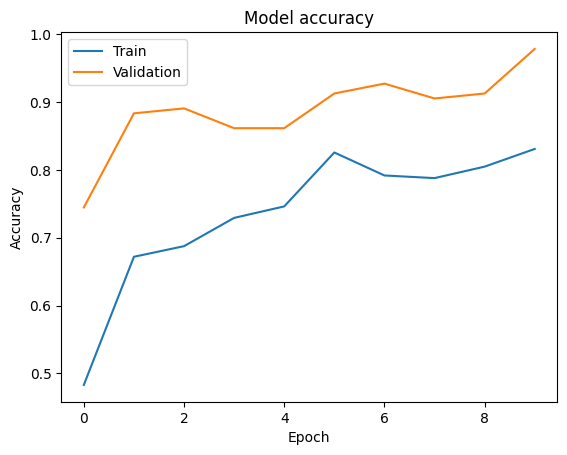

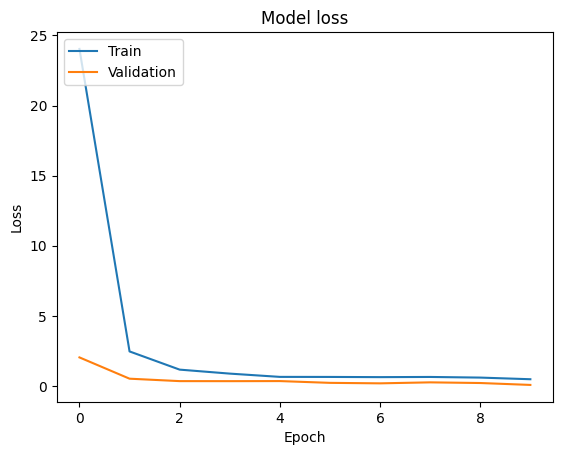

In [ ]:
# Define the input shape for the ResNet50 model
IMG_SHAPE = (256, 256, 3)

# Load the pre-trained ResNet50 model (excluding the top classification layer)
base_model = ResNet50(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# Freeze the layers of the base model (optional, but often recommended)
base_model.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x) # Adjust the number of neurons as needed
x = Dropout(0.5)(x) # Add dropout for regularization
predictions = Dense(len(dataset.class_names), activation='softmax')(x) # Output layer


# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',  # You can try other optimizers
              loss='sparse_categorical_crossentropy', # Use categorical_crossentropy if label_mode='categorical'
              metrics=['accuracy'])

# Train the model and store the history
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset) # Adjust the number of epochs

# Evaluate the model
loss, accuracy = model.evaluate(val_dataset) # Evaluate on the validation set
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **VGG16**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.3459 - loss: 28.1159 - val_accuracy: 0.7883 - val_loss: 1.8764
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.6942 - loss: 2.5996 - val_accuracy: 0.8613 - val_loss: 0.6139
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7186 - loss: 1.1270 - val_accuracy: 0.8248 - val_loss: 0.4387
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.7510 - loss: 0.7375 - val_accuracy: 0.8686 - val_loss: 0.3090
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.8110 - loss: 0.5602 - val_accuracy: 0.9343 - val_loss: 0.2327
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.8377 - loss: 0.5439 - val_accuracy: 0.9562 - val_loss: 0.1475
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.8514 - loss: 0.5553 - val_accuracy: 0.9270 - val_loss: 0.1769
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.85

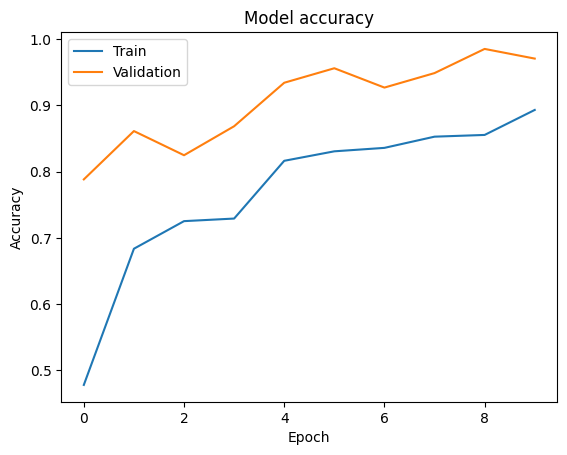

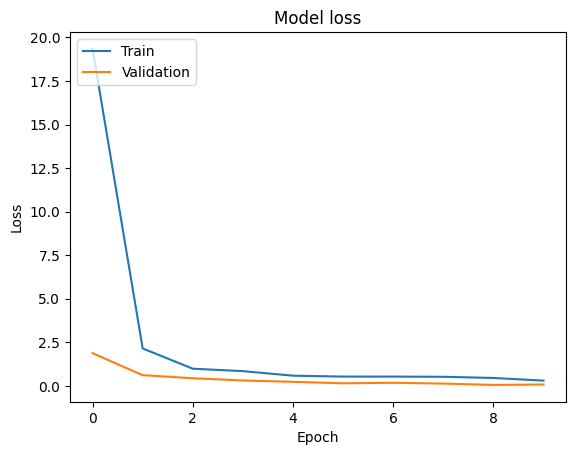

In [ ]:
IMG_SHAPE = (256, 256, 3)

# Load the pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(dataset.class_names), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store history
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Evaluate the model
loss, accuracy = model.evaluate(val_dataset)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **SEQUENTIAL**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.1335 - loss: 298.3332 - val_accuracy: 0.1533 - val_loss: 2.0815
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.1552 - loss: 3.5176 - val_accuracy: 0.3285 - val_loss: 1.9365
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.2709 - loss: 1.8792 - val_accuracy: 0.4161 - val_loss: 1.6000
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.3969 - loss: 1.5626 - val_accuracy: 0.4672 - val_loss: 1.5417
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.4314 - loss: 1.5309 - val_accuracy: 0.6861 - val_loss: 1.0146
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.5273 - loss: 1.2496 - val_accuracy: 0.5912 - val_loss: 1.0798
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.5709 - loss: 1.1297 - val_accuracy: 0.6861 - val_loss: 0.7317
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6950 - loss: 0.7717 - val_accuracy: 0.8321 - val_loss: 0.6180
E

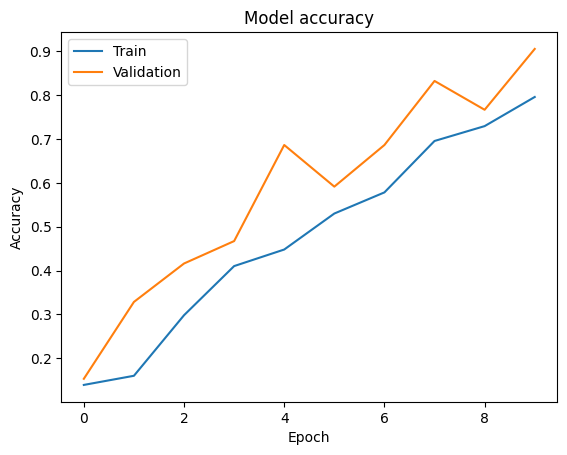

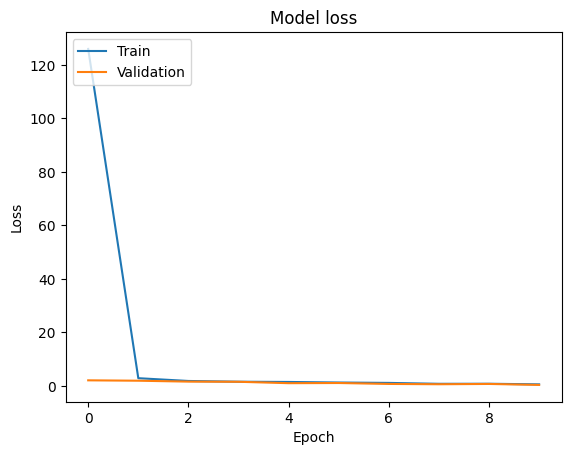

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the sequential model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    Dense(len(dataset.class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store history
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

# Evaluate the model
loss, accuracy = model.evaluate(val_dataset)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# prompt: how to identify the disease type from the images given as dataset

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Assuming dataset is already loaded and preprocessed as shown in the original code

# Split the dataset into training and validation sets
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# The rest of your code (model definition, compilation, training, evaluation, and plotting)
# can remain the same, but now use train_dataset and val_dataset.